In [2]:
## CNN with 4 Convolutional Layers and Batch Normalization

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
np.random.seed(12345)
%matplotlib inline

/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
train_images_path = keras.utils.get_file('train-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz')
train_labels_path = keras.utils.get_file('train-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz')
test_images_path = keras.utils.get_file('t10k-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz')
test_labels_path = keras.utils.get_file('t10k-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz')


In [5]:
batch_size = 512

In [6]:
def load_mnist(images_path, labels_path):
    import os
    import gzip
    import numpy as np

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [7]:
X_train_orig, y_train_orig = load_mnist(train_images_path, train_labels_path)
X_test, y_test = load_mnist(test_images_path, test_labels_path)
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

In [8]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


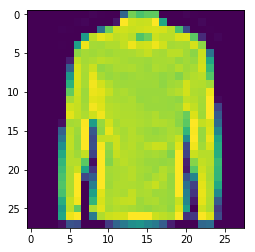

In [11]:
plt.imshow(X_train[1, :].reshape((28, 28)))

In [12]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [13]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
def norm_input(x): return (x-mean_px)/std_px

In [14]:
cnn3 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [15]:
cnn3.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [15]:
cnn3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 596s 12ms/step - loss: 0.7053 - acc: 0.7588 - val_loss: 0.3926 - val_acc: 0.8568
Epoch 2/10
48000/48000 [==============================] - 301s 6ms/step - loss: 0.4238 - acc: 0.8485 - val_loss: 0.3397 - val_acc: 0.8799
Epoch 3/10
48000/48000 [==============================] - 281s 6ms/step - loss: 0.3511 - acc: 0.8749 - val_loss: 0.2686 - val_acc: 0.9046
Epoch 4/10
48000/48000 [==============================] - 283s 6ms/step - loss: 0.3084 - acc: 0.8900 - val_loss: 0.2565 - val_acc: 0.9095
Epoch 5/10
48000/48000 [==============================] - 285s 6ms/step - loss: 0.2787 - acc: 0.8994 - val_loss: 0.2315 - val_acc: 0.9169
Epoch 6/10
48000/48000 [==============================] - 285s 6ms/step - loss: 0.2596 - acc: 0.9058 - val_loss: 0.2315 - val_acc: 0.9164
Epoch 7/10
48000/48000 [==============================] - 284s 6ms/step - loss: 0.2404 - acc: 0.9124 - val_loss: 0.2074 -

In [16]:
cnn3.optimizer.lr = 0.0001

In [17]:
cnn3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 276s 6ms/step - loss: 0.1930 - acc: 0.9304 - val_loss: 0.1978 - val_acc: 0.9316
Epoch 2/10
48000/48000 [==============================] - 278s 6ms/step - loss: 0.1798 - acc: 0.9354 - val_loss: 0.1923 - val_acc: 0.9343
Epoch 3/10
48000/48000 [==============================] - 327s 7ms/step - loss: 0.1696 - acc: 0.9394 - val_loss: 0.2083 - val_acc: 0.9282
Epoch 4/10
48000/48000 [==============================] - 323s 7ms/step - loss: 0.1655 - acc: 0.9396 - val_loss: 0.2069 - val_acc: 0.9291
Epoch 5/10
48000/48000 [==============================] - 290s 6ms/step - loss: 0.1540 - acc: 0.9442 - val_loss: 0.2033 - val_acc: 0.9312
Epoch 6/10
48000/48000 [==============================] - 286s 6ms/step - loss: 0.1442 - acc: 0.9471 - val_loss: 0.1822 - val_acc: 0.9372
Epoch 7/10
48000/48000 [==============================] - 291s 6ms/step - loss: 0.1400 - acc: 0.9490 - val_loss: 0.1897 - 

In [18]:
score = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21401405726000666
Test accuracy: 0.9325


In [21]:
# Data Augmentation

In [16]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, y_val, batch_size=batch_size)


In [ ]:
cnn3.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50,
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)


Epoch 1/50
61/93 [==================>...........] - ETA: 1:38 - loss: 0.9933 - acc: 0.6626

In [ ]:
score = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
cnn3.summary()